In [136]:
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence  import  pad_sequences
from numpy import array 
import pandas as pd 
from sklearn.model_selection import train_test_split

%matplotlib inline


In [58]:
# # define documents
# docs = ['Well done!',
# 		'Good work',
# 		'Great effort',
# 		'nice work',
# 		'Excellent!',
# 		'Weak',
# 		'Poor effort!',
# 		'not good',
# 		'poor work',
# 		'Could have done better.']
# # define class labels
# labels = array([1,1,1,1,1,0,0,0,0,0])
df = pd.read_csv('./yelp.csv')
df = df[['text','stars']]
df.head(2)

,text,stars
0,My wife took me here on my birthday for breakf...,5
1,I have no idea why some people give bad review...,5


In [61]:
df.stars = df.stars.apply(lambda x: 1 if x > 3 else 0)


In [66]:
df.sample(5)

,text,stars
7241,"At the ripe old age of 3, it's time for my pre...",1
1863,"Like many before me, I am trying to be sure to...",1
208,Wednesday 7pm. This place is your average ove...,0
214,I thought Trader Vic's was very nice. Food wa...,1
9976,I was looking for chile rellenos and this plac...,0


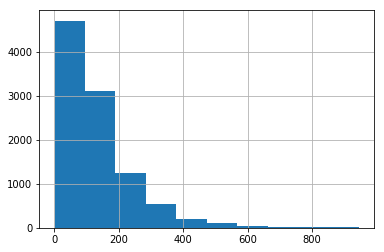

In [138]:
a = df.text.apply(lambda x : len(x.split(" ")))
a.hist()
max_length = max(a)
max_length = 400

In [150]:
a.argmax() , max(a)

/home/mostafa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


(3686, 945)

In [151]:
# integer encode the documents
vocab_size = 1000
encoded_docs = [one_hot(d, vocab_size) for d in df.text]
print(encoded_docs[3686]) , len(encoded_docs[3686])

[115, 218, 716, 962, 36, 512, 470, 363, 38, 947, 954, 738, 164, 686, 962, 528, 954, 784, 818, 341, 898, 802, 679, 353, 520, 115, 11, 974, 341, 229, 686, 80, 636, 368, 34, 341, 528, 769, 937, 954, 209, 632, 191, 80, 900, 716, 673, 917, 534, 818, 341, 171, 368, 11, 402, 784, 469, 421, 38, 956, 470, 818, 974, 64, 353, 863, 853, 104, 595, 513, 446, 402, 345, 445, 359, 11, 115, 553, 356, 261, 716, 216, 410, 388, 520, 735, 818, 898, 898, 291, 419, 975, 379, 837, 823, 761, 853, 799, 877, 209, 697, 630, 179, 637, 453, 881, 664, 818, 341, 603, 110, 679, 664, 291, 419, 975, 115, 841, 686, 341, 962, 528, 725, 291, 712, 273, 913, 725, 84, 737, 553, 115, 25, 34, 522, 115, 270, 341, 727, 353, 577, 954, 566, 738, 38, 399, 397, 203, 784, 818, 954, 115, 761, 570, 954, 784, 818, 38, 665, 577, 115, 818, 738, 123, 185, 175, 115, 2, 263, 115, 408, 954, 566, 738, 602, 392, 115, 345, 407, 522, 291, 712, 389, 733, 57, 673, 991, 716, 22, 465, 84, 22, 263, 593, 580, 630, 389, 733, 826, 317, 630, 716, 799, 996, 

(None, 953)

In [259]:
# pad documents to a max length of 4 words
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_docs.shape
final_data = pd.DataFrame(data={"padded_docs" : list(padded_docs), "rate": df.stars})
final_data.head()

,padded_docs,rate
0,"[954, 727, 828, 10, 356, 994, 954, 136, 686, 5...",1
1,"[115, 454, 47, 667, 737, 382, 812, 75, 171, 86...",1
2,"[169, 38, 543, 437, 784, 698, 175, 24, 954, 11...",1
3,"[185, 607, 954, 115, 169, 619, 770, 361, 11, 4...",1
4,"[940, 960, 363, 363, 698, 341, 24, 126, 446, 7...",1


In [289]:
X_train, X_test, y_train, y_test = train_test_split(final_data.padded_docs, final_data.rate , test_size=0.30)

In [290]:
X_train.index

Int64Index([2174, 5116, 5508, 3069, 8542, 7982, 9620, 5380, 8603, 3852,
            ...
            5941, 1556, 2187, 6526, 8833, 7951, 7865, 6902, 2975, 5999],
           dtype='int64', length=7000)

In [291]:
X_train.shape, y_train.shape, X_test.shape , y_test.shape

((7000,), (7000,), (3000,), (3000,))

In [292]:
def conve(x):
    a = np.zeros((x.shape[0],400))
    c = -1
    for i in x:
        c += 1
        for j in range(400):
            a[c][j] = i[j]
    return a 

In [293]:
xtr = conve(X_train)
xtest = conve(X_test)

In [229]:

# define the model
model = Sequential()
model.add(Embedding(vocab_size, 300, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 400, 300)          300000    
_________________________________________________________________
flatten_5 (Flatten)          (None, 120000)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 120001    
Total params: 420,001
Trainable params: 420,001
Non-trainable params: 0
_________________________________________________________________
None


In [294]:
import time 
tick = time.time()
model.fit(xtr, y_train, epochs=4, verbose=0)
print((time.time() - tick)/60)


0.2375691533088684


In [295]:
# evaluate the model
loss, accuracy = model.evaluate(xtest, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

3000/3000 [==============================] - 1s 185us/step
Accuracy: 96.800000


In [296]:
a = model.predict(xtest)

In [322]:
a = np.rint(a)
a.shape

(3000, 1)

In [329]:
c = -1
for i,d in df.iloc[X_test.index].iterrows():
    c+=1
    if a[c] == 0 :
        print(d['text'],'-'*10,a[c])
        print(100*'*')
    if c == 200 :
        break


Long wait for food, waitresses that don't know what they're doing, grumpy hosts, and crappy food that keeps us off the lake for 2 hours is not somewhere I plan on going ever again. ---------- [0.]
****************************************************************************************************
Ok, so this is a Sprouts now. Boring.
The layout of the store is pretty much the same as when it was Sunflower. I would like this Sprouts more, if it was like an actual Sprouts. Instead it's just a weird transitiony in between "Sproutsflower". That's what I'm calling it, until they figure it out. Atleast they still have the soup bar. ---------- [0.]
****************************************************************************************************
My boyfriend and I were searching for a dive near our house in Old Town for when we just aren't feeling the typical Scottsdale vibe.  I gotta tell you, I think we found it.  

We walked in around 7 on a Thursday night, just looking to have a few dri